In [265]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')
df = pd.read_csv("raw_house_data.csv", delimiter=',')
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None


In [266]:
# There are 5000 rows and 16 columns (variables) in this data frame.
# For each column, I will take these two steps:
#    1) Understand what it is, of what type it is, etc.
#    2) Plot its histogram to see how the values are distributed.
#        2.a) If it has a normal distribution, determine its mean and standard deviation.
#    3) See if it has any missing values. Also, decide what to do with them.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [267]:
# Columns bathroom to HOA objects therefore their statistical measures does not exist.
# First I need to change the type of these columns.

# for 'bathrooms' there are 6 'None' values. I chose to set them equal to their 'bedrooms' value.
# This might not be ideal and might skew the results, but it is still better than 
# deleting them or replacing them with median or mean values.
df[df['bathrooms'] == 'None']

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
2025,3044867,660000.0,85614,-110.969465,31.836723,3.60,5526.00,2007,3,None,None,3,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",,"Carpet, Other: Tile-Other","1,000"
2766,3042851,575000.0,85614,-110.960497,31.854446,0.87,4623.05,2002,3,None,None,3,"Dishwasher, Garbage Disposal, Gas Range, Islan...",,"Carpet, Other",250
3108,3047540,610000.0,85614,-111.002544,31.840061,1.70,3800.00,2007,3,None,None,3,None,,None,"1,200"
3529,3046317,535000.0,85614,-110.986426,31.806614,4.27,3826.25,2006,2,None,None,3,"Dishwasher, Garbage Disposal, Gas Range, Islan...",,"Carpet, Other: Tile-Other",None
3822,3045347,550000.0,85614,-111.008754,31.841141,0.99,3702.07,2007,2,None,None,3,"Dishwasher, Garbage Disposal, Island, Lazy Sus...",,"Carpet, Other: Tile-Other","1,200"
4812,3046287,500000.0,85646,-111.051431,31.636207,1.03,8102.00,1999,4,None,None,2,"Dishwasher, Electric Range, Garbage Disposal, ...",,"Carpet, Mexican Tile",250


In [268]:
# I estimated the number of bathrooms with the number of bedrooms.
df.loc[df['bathrooms'] == 'None', 'bathrooms'] = df['bedrooms']
df[df['bathrooms'] == 'None']

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [269]:
# Now I change the type of column 'bathroom'
df['bathrooms'] = df['bathrooms'].astype(float)
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.828700
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.386864
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000


In [270]:
# Now I repeat this for column sqrt_ft.
len(df[df['sqrt_ft'] == 'None'])
df[df['sqrt_ft'] == 'None']
# There are 56 records with sqrt = None. One option is to replace them with lot_acres
# (with acres to square feet conversion). This does not look like a good idea as it
# adds some very large and unrealistic numbers in this column.
# They consist around 1% of the whole data frame; therefore, I decided to delete them.
df.drop(df[df.sqrt_ft == 'None'].index, inplace=True)
df[df['sqrt_ft'] == 'None']

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [271]:
# Now I can change the type of the column to float.
df['sqrt_ft'] = df['sqrt_ft'].astype(float)

In [272]:
# Now I repeat this for column garage.
len(df[df['garage'] == 'None'])
df[df['garage'] == 'None']

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
263,4115554,1200000.0,85646,-111.040612,31.594683,91.70,8473.86,1925,6,5.0,6884.0,None,"Dishwasher, Double Sink, Island, Prep Sink, Re...",7,"Carpet, Concrete",None
590,4113651,900000.0,85646,-111.037399,31.574636,34.45,3354.10,1964,3,3.0,2759.0,None,"Dishwasher, Double Sink, Garbage Disposal, Ref...",2,Concrete,None
4275,4116010,490000.0,85601,-111.299663,31.584173,38.98,5739.00,1977,4,3.0,2811.0,None,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Vinyl",None
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4,4.0,4317.0,None,"Compactor, Dishwasher, Double Sink, Island, Ap...",3,"Carpet, Mexican Tile",None


In [273]:
# The best solution looks like to replace them with zeros. It looks like all these records
# belong to large properties. Therefore, it is very probable that they have many parking places.
# But I think the best solution is to put zero instead of none.
df.loc[df['garage'] == 'None', 'garage'] = 0
df['garage'] = df['garage'].astype(float)

In [274]:
# Next column is kitchen_features. A string type looks like the best choice for it.
print(len(df[df['kitchen_features'] == 'None']))
# There are 32 records with kitchen_features=None. I can accept it as a valid
# value meaing that the kitchen has no known features.

32


In [275]:
df['kitchen_features'] = df['kitchen_features'].astype(str)

In [276]:
# Next column is fireplaces. An integer type looks like the best choice for it.
print(len(df[df['fireplaces'] == 'None']))
# There is no record with fireplaces=None. Its type can be changed to int now.

0


In [277]:
df['fireplaces'] = df['fireplaces'].astype(int)

In [278]:
# Next column is floor_covering. A string type looks like the best choice for it.
print(len(df[df['floor_covering'] == 'None']))
# There is no record with floor_covering=None.

0


In [279]:
df['floor_covering'] = df['floor_covering'].astype(str)

In [280]:
# The last column is HOA. An int type looks like the best choice for it.
print(len(df[df['HOA'] == 'None']))
# There are 544 records with HOA=None. I should first change all th None
# values to 0 (Note: there are originally no record with HOA=0).
# Later on, I will find a better estimation for those values.
print(len(df[df['HOA'] == 0]))

544
0


In [281]:
df.loc[df['HOA'] == 'None', 'HOA'] = 0
# Some records in have character ',' in their HOA.
df['HOA'] = df['HOA'].str.replace(',', '')
df['HOA'] = df['HOA'].astype(float)

In [282]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4944 non-null   int64  
 1   sold_price        4944 non-null   float64
 2   zipcode           4944 non-null   int64  
 3   longitude         4944 non-null   float64
 4   latitude          4944 non-null   float64
 5   lot_acres         4944 non-null   float64
 6   taxes             4944 non-null   float64
 7   year_built        4944 non-null   int64  
 8   bedrooms          4944 non-null   int64  
 9   bathrooms         4944 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4944 non-null   float64
 12  kitchen_features  4944 non-null   object 
 13  fireplaces        4944 non-null   int64  
 14  floor_covering    4944 non-null   object 
 15  HOA               4400 non-null   float64
dtypes: float64(9), int64(5), object(2)
memory 

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,4.944000e+03,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4400.000000
mean,2.147703e+07,7.757358e+05,85724.128236,-110.910942,32.314540,4.270884,9.444989e+03,1992.259506,3.935477,3.824939,3716.366828,2.813309,1.883495,102.468702
std,1.419951e+06,3.160465e+05,36.803079,0.120604,0.169380,45.851750,1.739144e+05,65.830904,1.160795,1.318048,1120.683515,1.199474,1.135463,549.054089
min,4.110917e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140945e+07,5.850000e+05,85718.000000,-110.978591,32.280278,0.580000,4.819410e+03,1987.000000,3.000000,3.000000,3047.000000,2.000000,1.000000,8.000000
50%,2.161620e+07,6.790000e+05,85737.000000,-110.922462,32.319136,0.980000,6.248770e+03,1999.000000,4.000000,4.000000,3512.000000,3.000000,2.000000,55.000000
75%,2.180543e+07,8.400000e+05,85750.000000,-110.858578,32.396124,1.740000,8.106153e+03,2006.000000,4.000000,4.000000,4130.250000,3.000000,3.000000,135.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,20000.000000


In [283]:
# I decided to look at the correlations only after converting the columns and removing of invalid and null values.
df.corr()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
MLS,1.000000,0.007850,0.182158,0.076804,0.330857,-0.042810,0.002470,0.008159,-0.041226,-0.056862,-0.086821,0.016818,-0.070055,-0.017537
sold_price,0.007850,1.000000,-0.053015,-0.040086,0.029247,0.300248,0.023486,-0.013887,0.130610,0.353143,0.531191,0.100402,0.384483,0.172274
zipcode,0.182158,-0.053015,1.000000,0.026744,0.409302,-0.131448,-0.002000,0.042472,0.049453,-0.050693,-0.008548,0.091523,-0.015192,-0.022371
longitude,0.076804,-0.040086,0.026744,1.000000,-0.300697,0.156190,-0.001164,-0.008676,0.064030,0.019989,0.058771,-0.038414,0.048043,-0.021025
latitude,0.330857,0.029247,0.409302,-0.300697,1.000000,-0.203413,0.000163,0.087878,-0.107225,-0.075212,-0.123644,0.074509,-0.084295,0.035685
lot_acres,-0.042810,0.300248,-0.131448,0.156190,-0.203413,1.000000,-0.000728,-0.045200,0.092419,0.065943,0.121918,-0.061810,0.076359,-0.008499
taxes,0.002470,0.023486,-0.002000,-0.001164,0.000163,-0.000728,1.000000,0.000065,0.005001,0.008969,0.037630,0.005630,0.022588,0.004596
year_built,0.008159,-0.013887,0.042472,-0.008676,0.087878,-0.045200,0.000065,1.000000,-0.087183,-0.066130,-0.046397,0.107476,-0.032458,0.014803
bedrooms,-0.041226,0.130610,0.049453,0.064030,-0.107225,0.092419,0.005001,-0.087183,1.000000,0.649127,0.590305,0.052154,0.163442,-0.066924
bathrooms,-0.056862,0.353143,-0.050693,0.019989,-0.075212,0.065943,0.008969,-0.066130,0.649127,1.000000,0.701917,0.113366,0.240841,0.004980


In [ ]:
# The matrix shows that the majority of the columns are not strongly correlated.
# This is not of a surprise as the properties are sold on different years and places.
# They also, have different sizes and features.
# The only columns that have some degree of correlation are:
# sold_price and sqrt_ft
# bedrooms and bathrooms
# bedrooms and sqrt_ft
# bathrooms and sqrt_ft
# and to an even lesser degree between:
# latitude and zipcode
# fireplaces and sqrt_ft
#
# If there was some data about the year the properties are sold, then it would be
# a chance to find a stronger correlation between some of the columns.

<AxesSubplot:>

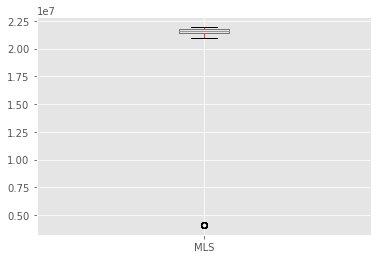

In [284]:
# Now I can look at each column one by one.

# I start with the first column: MLS
# MLS is a number assigned to a property when it is going to be sold.
# First let's have a look at its box plot.
df.boxplot(column='MLS')

[]

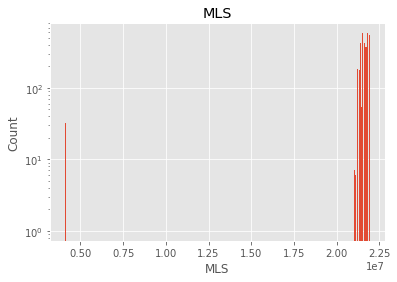

In [285]:
# Both the boxplot and the histograms below show that there is a small group of outlier values for MLS.
# here is its histogram:
hist = df['MLS'].hist(bins=500)
hist.set_title('MLS')
hist.set_xlabel('MLS')
hist.set_ylabel('Count')
plt.semilogy()

[]

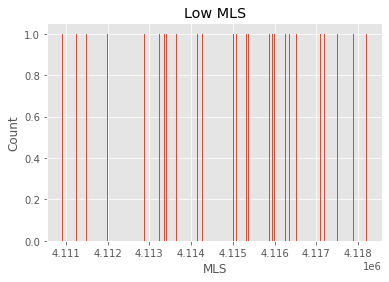

In [286]:
# It looks like its values are split into two separate ranges.
# I plot them separately
new_df = df[df['MLS'] < 20000000]
hist = new_df['MLS'].hist(bins=400)
hist.set_title('Low MLS')
hist.set_xlabel('MLS')
hist.set_ylabel('Count')
plt.plot()
# This part of the data has a uniform distribution.

[]

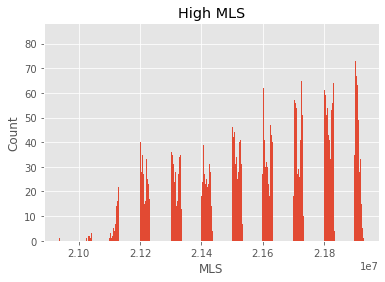

In [287]:
new_df = df[df['MLS'] >= 20000000]
hist = new_df['MLS'].hist(bins=500)
hist.set_title('High MLS')
hist.set_xlabel('MLS')
hist.set_ylabel('Count')
plt.plot()
# The MLS has a periodic nature. Each period has a sharp normal distribution with some skew to sides.

<AxesSubplot:>

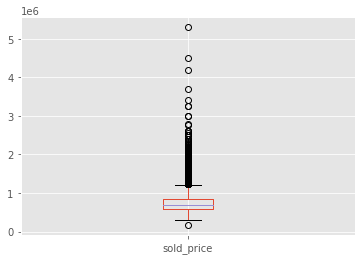

In [288]:
# Column 2 is sold_price
df.boxplot(column='sold_price')

[]

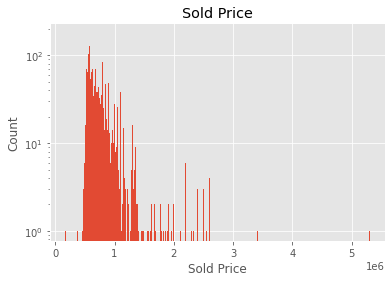

In [289]:
# Again, both the boxplot and the histogram show that there are a large number of outlier values among high values.
hist = df['sold_price'].hist(bins=1000)
hist.set_title('Sold Price')
hist.set_xlabel('Sold Price')
hist.set_ylabel('Count')
plt.semilogy()

In [290]:
# It looks like it has a normal distribution that is skewed to the right.
# There are irregularities in the prices above $2M that does not follow the normal distribution.
new_df = df[df['sold_price'] > 2000000]
print(len(new_df))
new_df = new_df[new_df['sold_price'] > 3000000]
print(len(new_df))

48
7


[]

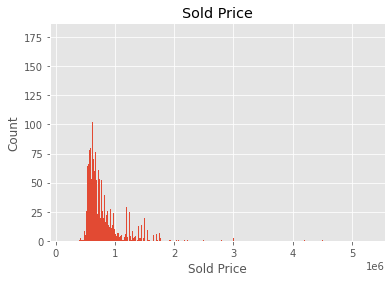

In [291]:
# Here is the non-logarithmic histogram of sold_porice:
hist = df['sold_price'].hist(bins=1000)
hist.set_title('Sold Price')
hist.set_xlabel('Sold Price')
hist.set_ylabel('Count')
plt.plot()

<AxesSubplot:>

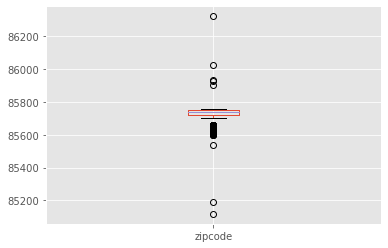

In [292]:
# Column 3 is zipcode
df.boxplot(column='zipcode')

[]

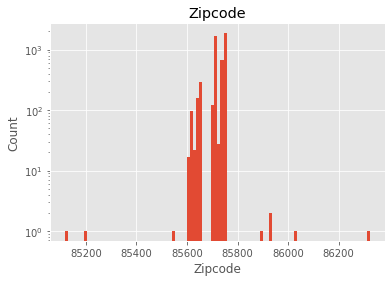

In [293]:
# The outliers are on both sides of the main distribution.
hist = df['zipcode'].hist(bins=100)
hist.set_title('Zipcode')
hist.set_xlabel('Zipcode')
hist.set_ylabel('Count')
plt.semilogy()

[]

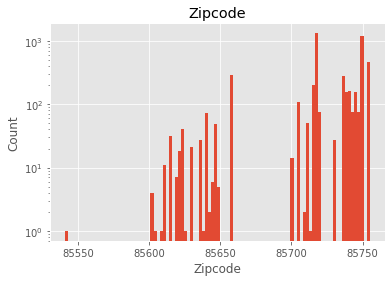

In [294]:
# It has a sharp normal distribution at the center with some skew towards left.
# There are small number of scattered values at the two ends of the histogram.
# Here is a closer look at the distribution at the center of the spectrum:
new_df = df[df['zipcode'] > 85500]
new_df = new_df[new_df['zipcode'] < 85800]
hist = new_df['zipcode'].hist(bins=100)
hist.set_title('Zipcode')
hist.set_xlabel('Zipcode')
hist.set_ylabel('Count')
plt.semilogy()

<AxesSubplot:>

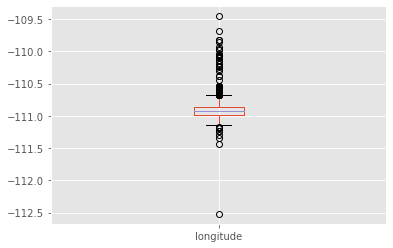

In [295]:
# Column 4 is longitude.
df.boxplot(column='longitude')

[]

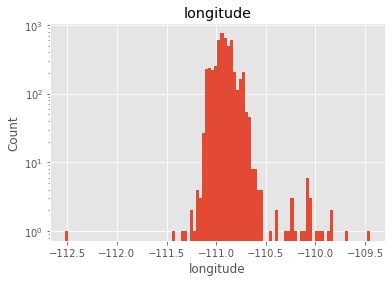

In [296]:
# The outliers are more to the top of the boxplot.
hist = df['longitude'].hist(bins=100)
hist.set_title('longitude')
hist.set_xlabel('longitude')
hist.set_ylabel('Count')
plt.semilogy()

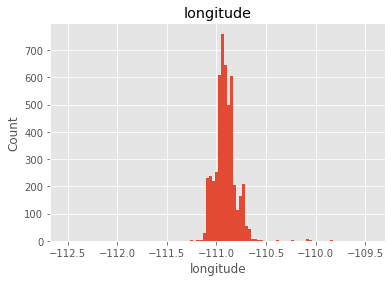

In [297]:
# It has a normal distribution around -110.9.
# There are some scattered values near the edges of the histogram
# which do not fit into the normal distribution.
hist = df['longitude'].hist(bins=100)
hist.set_title('longitude')
hist.set_xlabel('longitude')
hist.set_ylabel('Count')
plt.show()

<AxesSubplot:>

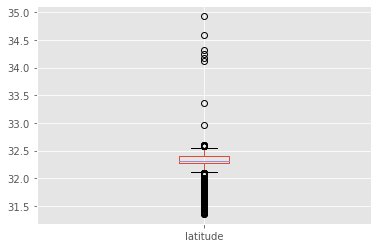

In [298]:
# Column 5 is latitude.
df.boxplot(column='latitude')

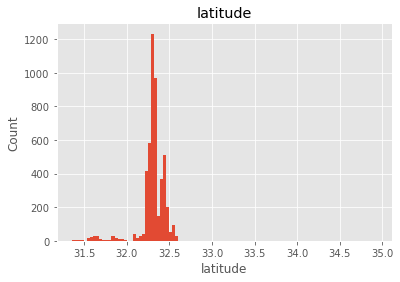

In [299]:
# The majority of the outliers are below the main box.
hist = df['latitude'].hist(bins=100)
hist.set_title('latitude')
hist.set_xlabel('latitude')
hist.set_ylabel('Count')
plt.show()

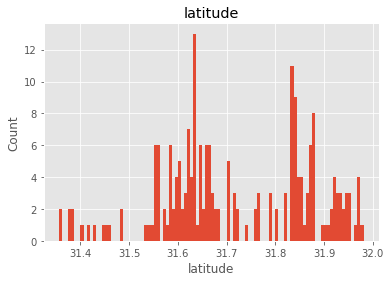

In [300]:
# It has a normal distribution around -32.3. it is skewed a bit to left.
# The skew to the left can be regarded as two small normal distributions as shown below.
# There are some scattered values to the right of the histogram which do not fit into the normal distribution.
new_df = df[df['latitude'] < 32]
hist = new_df['latitude'].hist(bins=100)
hist.set_title('latitude')
hist.set_xlabel('latitude')
hist.set_ylabel('Count')
plt.show()

<AxesSubplot:>

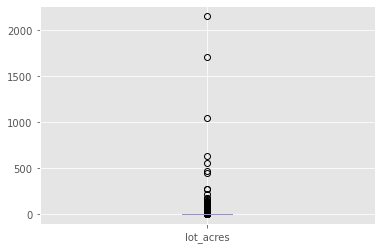

In [301]:
# Column 6 is lot_acres.
df.boxplot(column='lot_acres')

[]

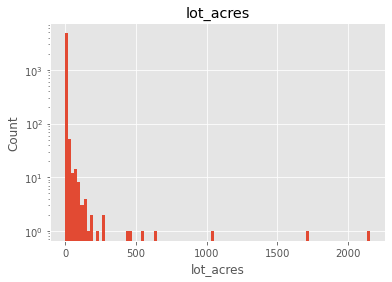

In [302]:
# The small box shows how tight the majority of the values are
# concentrated in a small range with some outliers above the box.
hist = df['lot_acres'].hist(bins=100)
hist.set_title('lot_acres')
hist.set_xlabel('lot_acres')
hist.set_ylabel('Count')
plt.semilogy()

In [303]:
# The majority of the values are below 500.
new_df = df[df['lot_acres'] > 500]
print(f'There are {len(new_df)} data points with lot_acres above 500')
# Aslo there are 35 data poisnt with lot_acres = 0 which is apparently a wrong value.
# I replace these values with their sqrt_ft value converted to acres.
new_df = df[df['lot_acres'] == 0]
print(f'There are {len(new_df)} data points with lot_acres = 0')
# I decided to convert sqrt_ft into acres and replace those zero acres with that.

There are 5 data points with lot_acres above 500
There are 35 data points with lot_acres = 0


In [304]:
df.loc[df['lot_acres'] == 0, 'lot_acres'] = df['sqrt_ft']*0.00002296
df[df['lot_acres'].isnull()]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


[]

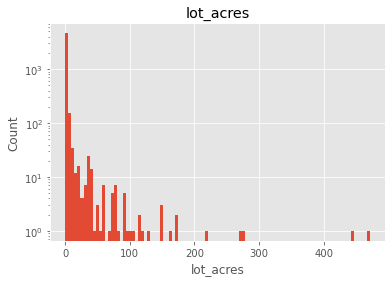

In [305]:
new_df = df[df['lot_acres'] <= 500]
hist = new_df['lot_acres'].hist(bins=100)
hist.set_title('lot_acres')
hist.set_xlabel('lot_acres')
hist.set_ylabel('Count')
plt.semilogy()
# Note: The diagram below has a logarithmic Y axis. A large majority of values are concentrated near 0.

<AxesSubplot:>

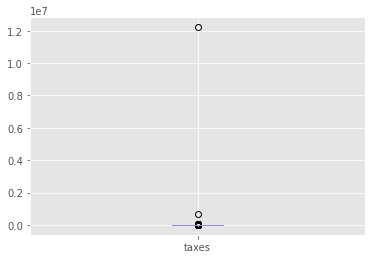

In [306]:
# Column 7 is taxes.
df.boxplot(column='taxes')

[]

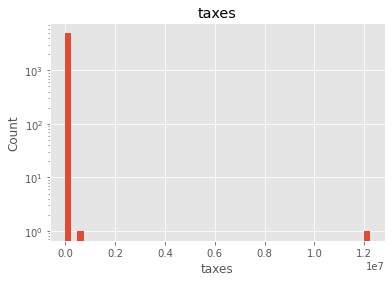

In [307]:
# The boxplot shows how concentrated the values are around the
# lower values. Very few outliers with large values are there.
hist = df['taxes'].hist(bins=50)
hist.set_title('taxes')
hist.set_xlabel('taxes')
hist.set_ylabel('Count')
plt.semilogy()

In [308]:
print(f'The number of data points with taxes higher than $40K is {len(df[df["taxes"] > 40000])}.')
print(f'The number of data points with zero taxes is {len(df[df["taxes"] == 0])}.')
print(f'The number of data points with blank taxes is {len(df[df["taxes"].isnull()])}.')
print(f'The number of data points with "None" taxes is {len(df[df["taxes"] == "None"])}.')
# I am unable to make a correct estimation of the taxes when they are 0; therefore, it is better to drop them.
df.drop(df[df.taxes == 'None'].index, inplace=True)

The number of data points with taxes higher than $40K is 2.
The number of data points with zero taxes is 22.
The number of data points with blank taxes is 0.
The number of data points with "None" taxes is 0.


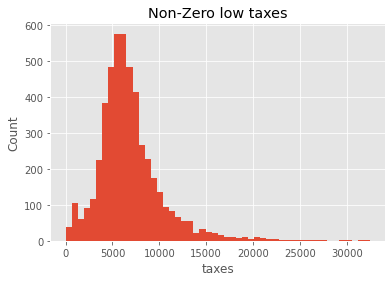

In [309]:
# Here is a histogram of non-zero value which are below $40K.
# It has a normal distribution with a right skew.
# The approximate peak of the distribution is $60K.
new_df = df[df['taxes'] != 0]
new_df = new_df[new_df['taxes'] <= 40000]
hist = new_df['taxes'].hist(bins=50)
hist.set_title('Non-Zero low taxes')
hist.set_xlabel('taxes')
hist.set_ylabel('Count')
plt.show()

<AxesSubplot:>

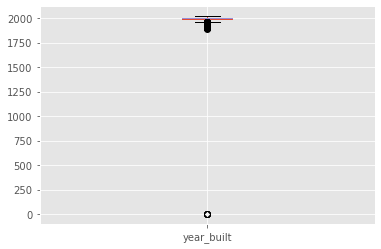

In [310]:
# Column 8 is year_built.
df.boxplot(column='year_built')

[]

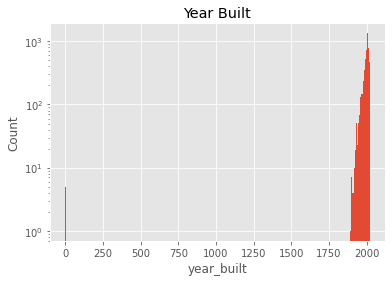

In [311]:
# Both the boxplot and the histogram show the left skew of lower values.
hist = df['year_built'].hist(bins=300)
hist.set_title('Year Built')
hist.set_xlabel('year_built')
hist.set_ylabel('Count')
plt.semilogy()

In [312]:
print(f'The number of data points with year built = 0 is {len(df[df["year_built"] == 0])}.')
print(f'The number of data points with blank year built is {len(df[df["year_built"].isnull()])}.')
print(f'The number of data points with "None" year built is {len(df[df["year_built"] == "None"])}.')

The number of data points with year built = 0 is 5.
The number of data points with blank year built is 0.
The number of data points with "None" year built is 0.


The number of data points with year built = 0 is 0.


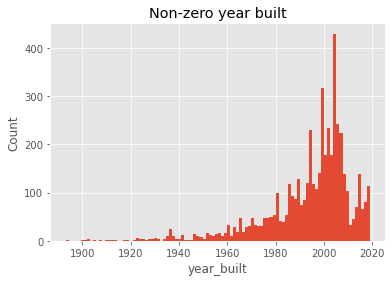

In [313]:
# I don't have any way to replace the zero values for year built.
# They are just 5 records. So, it's better to just delete them.
df = df[df.year_built != 0]
print(f'The number of data points with year built = 0 is {len(df[df["year_built"] == 0])}.')
hist = df['year_built'].hist(bins=100)
hist.set_title('Non-zero year built')
hist.set_xlabel('year_built')
hist.set_ylabel('Count')
plt.show()
# This feature has a normal distribution with a left skew.
# The peak of the distribution is around 2005.

<AxesSubplot:>

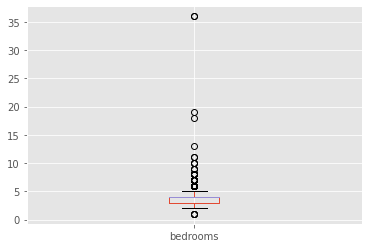

In [314]:
# Column 9 is bedrooms.
df.boxplot(column='bedrooms')

[]

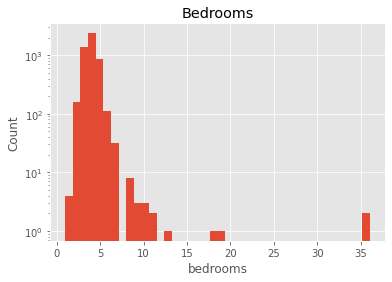

In [315]:
# There are only a few properties with large number of bedrooms.
hist = df['bedrooms'].hist(bins=40)
hist.set_title('Bedrooms')
hist.set_xlabel('bedrooms')
hist.set_ylabel('Count')
plt.semilogy()

The number of data points with blank bedrooms is 0.
The number of data points with "None" bedrooms is 0.
The number of data points with more than 15 bedrooms is 4.


[]

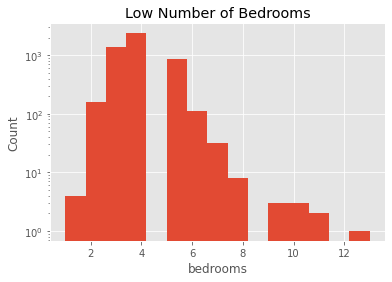

In [316]:
print(f'The number of data points with blank bedrooms is {len(df[df["bedrooms"].isnull()])}.')
print(f'The number of data points with "None" bedrooms is {len(df[df["bedrooms"] == "None"])}.')
# It looks like all the values in this column are valid.
# There are 4 records with more than 15 bedrooms. These do not fit into the normal distribution
# of the rest of this column.
# The rest of the records are all below 15.
print(f'The number of data points with more than 15 bedrooms is {len(df[df["bedrooms"] > 15])}.')
# Here is the histogram of the records with bedrooms below 15.
hist = df[df["bedrooms"] <= 15]['bedrooms'].hist(bins=15)
hist.set_title('Low Number of Bedrooms')
hist.set_xlabel('bedrooms')
hist.set_ylabel('Count')
plt.semilogy()
# A normal distribution with a right skew is observed.
# The peak is in 4.
# It is plotted in logarithmic scale to show the low
# values at the right side of the histogram. 

<AxesSubplot:>

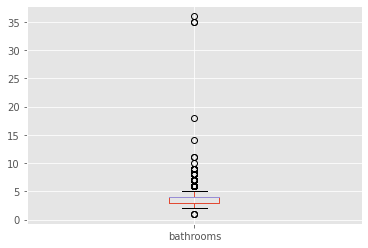

In [317]:
# Column 10 is bathrooms.
df.boxplot(column='bathrooms')

The number of data points with more than 20 bedrooms is 3.


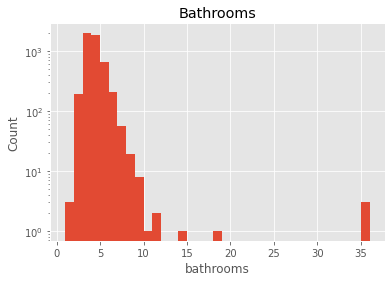

In [318]:
# There are only a few properties with large number of bathrooms.
hist = df['bathrooms'].hist(bins=35)
hist.set_title('Bathrooms')
hist.set_xlabel('bathrooms')
hist.set_ylabel('Count')
plt.semilogy()
# This column has a sharp normal distribution with a bit of skew to right.
# The peak is at 3. The three records with 35 bedrooms don't fit in the normal distribution.
print(f'The number of data points with more than 20 bedrooms is {len(df[df["bathrooms"] > 20])}.')

<AxesSubplot:>

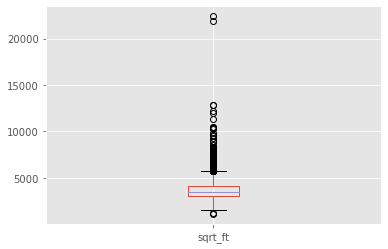

In [319]:
# Column 11 is sqrt_ft.
df.boxplot(column='sqrt_ft')

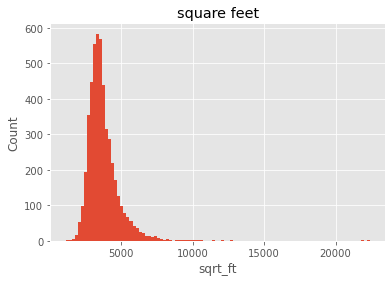

In [320]:
# Like the last two columns, with the majority of the data points having low
# values, there is a skew of larger values in the boxplot
hist = df['sqrt_ft'].hist(bins=100)
hist.set_title('square feet')
hist.set_xlabel('sqrt_ft')
hist.set_ylabel('Count')
plt.show()
# This column has a normal distribution with a long skew to right.

<AxesSubplot:>

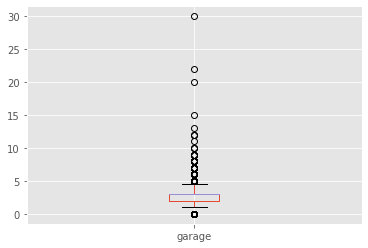

In [321]:
# Column 12 is garage.
df.boxplot(column='garage')

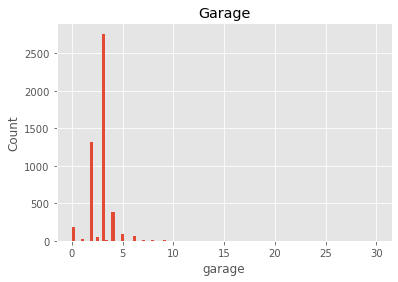

In [322]:
# there are very few properties with high number of garages.
hist = df['garage'].hist(bins=100)
hist.set_title('Garage')
hist.set_xlabel('garage')
hist.set_ylabel('Count')
plt.show()
# This column has a normal distribution. There are a few unexpected spikes at lower values.

[]

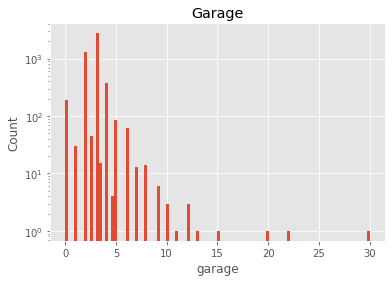

In [323]:
# As mentioned before, there are a few irregularities in high values (above 15).
# They can be seen in the logarithmic scale.
hist = df['garage'].hist(bins=100)
hist.set_title('Garage')
hist.set_xlabel('garage')
hist.set_ylabel('Count')
plt.semilogy()

In [324]:
# Column 13 is kitchen_features.
# I have no boxplot for this variable.

In [325]:
# This column consists of strings. In total there are 1817 unique combinations of features.
# To analyze them I thought of:
#    1) Converting each unique combination into a unique code.
#    2) Finding the most important ones (maybe, the most frequent ones) and add them to the
#.      table in either one column or multiple columns.
print(f'column kitchen_features has {len(df["kitchen_features"].unique())} values')

column kitchen_features has 1817 values


Number of rows with blank fireplaces is 0


<AxesSubplot:>

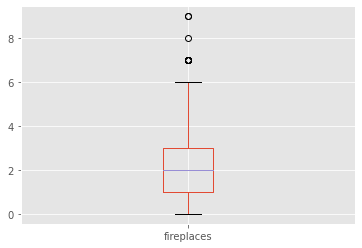

In [336]:
# Column 14 is fireplaces.
print(f'Number of rows with blank fireplaces is {len(df[df["fireplaces"].isnull()])}')
df.boxplot(column='fireplaces')

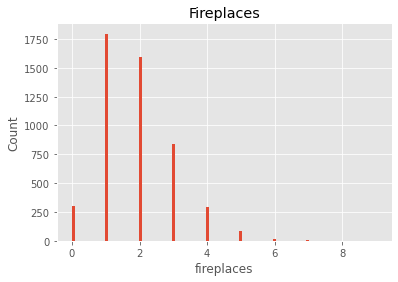

In [327]:
# The normal distribution is wider with a few outliers.
hist = df['fireplaces'].hist(bins=100)
hist.set_title('Fireplaces')
hist.set_xlabel('fireplaces')
hist.set_ylabel('Count')
plt.show()
# This variable has a normal distribution with a right skew.

In [328]:
# Column 15 is floor_covering.
# There is no boxplot for this variable.

column floor_covering has 295 values


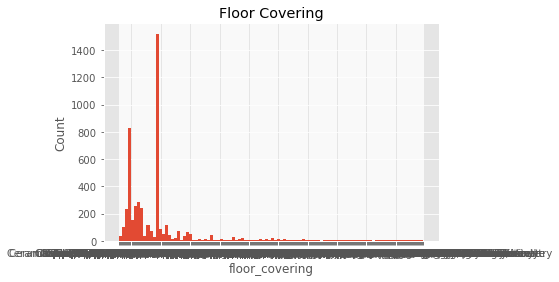

In [329]:
print(f'column floor_covering has {len(df["floor_covering"].unique())} values')
hist = df['floor_covering'].hist(bins=100)
hist.set_title('Floor Covering')
hist.set_xlabel('floor_covering')
hist.set_ylabel('Count')
plt.show()
# This variable has a normal distribution with a right skew with an unexpected spike at the right.
# Like kitchen_features, this column also has lots of unique values. The same two solutions can be considered.

<AxesSubplot:>

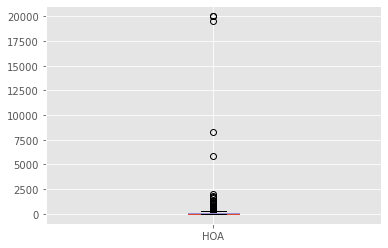

In [331]:
# Column 16 is HOA.
df.boxplot(column='HOA')

[]

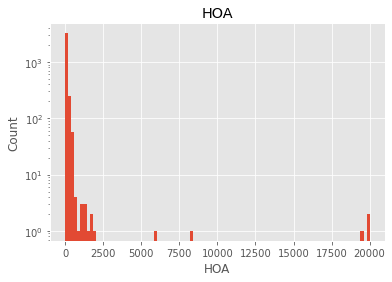

In [332]:
# The normal distribution has a very large standard deviation and there are a few outlier values above the box.
new_df = df[df['HOA'] != 0]
hist = new_df['HOA'].hist(bins=100)
hist.set_title('HOA')
hist.set_xlabel('HOA')
hist.set_ylabel('Count')
plt.semilogy()

In [333]:
# The majority of the values are below $2500. There are 5
print(f'There are {len(df[df["HOA"] > 2500])} records with HOA above $2500.')

There are 5 records with HOA above $2500.


In [ ]:
# For missed HOAs (HOA = 0), I found no very good estimation.
# The very low correlation between HOA and other columns reinforces this conclusion.
# That is mainly because we don't know when the properties were sold.
# This is one major factor that affects the HOA as well as taxes.
# One solution is to assign the median of the HOAs with the same zipcode with close MLSs.
# That is based on the assumption that properties sold on same years have close MLSs.
# This assumption is disputable. I have not implemented this option.